In [1]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_excel("Data_Train.xlsx")

In [3]:
train_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
train_df.shape

(10683, 11)

In [5]:
test_df = pd.read_excel("Test_set.xlsx")

In [6]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [7]:
test_df.shape

(2671, 10)

In [8]:
#different ways to join 2 datasets
# merge() --------->3rd most useful technique
#join() --------->4th most useful technique
#concat() --------->most useful technique
#append() ---------> 2nd most useful technique
final_df = train_df.append(test_df)

C:\Users\swaraj jaiswal\AppData\Local\Temp\ipykernel_7956\1170589297.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = train_df.append(test_df)


In [9]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0


In [10]:
#feature engineering
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Date_of_Journey  13354 non-null  object 
 2   Source           13354 non-null  object 
 3   Destination      13354 non-null  object 
 4   Route            13353 non-null  object 
 5   Dep_Time         13354 non-null  object 
 6   Arrival_Time     13354 non-null  object 
 7   Duration         13354 non-null  object 
 8   Total_Stops      13353 non-null  object 
 9   Additional_Info  13354 non-null  object 
 10  Price            10683 non-null  float64
dtypes: float64(1), object(10)
memory usage: 1.2+ MB


## so our first target is date we need to split it

In [11]:
#the first step we will do is seperating date into day,month,year
#another way--->
# final_df[['day','month','year']] = final_df['Date_of_Journey'].str.split('/',expand = True)
final_df["Date"]=final_df["Date_of_Journey"].str.split("/").str[0]
final_df["Month"]=final_df["Date_of_Journey"].str.split("/").str[1]
final_df["Year"]=final_df["Date_of_Journey"].str.split("/").str[2]

In [12]:
final_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [13]:
final_df = final_df.drop(["Date_of_Journey"],axis=1)

In [14]:
final_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN,6,06,2019
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,NaN,27,03,2019
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN,6,03,2019
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,NaN,6,03,2019


In [15]:
#another way
'''
final_df["Date"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[0])
final_df["Month"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[1])
final_df["Year"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[2])'''

'\nfinal_df["Date"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[0])\nfinal_df["Month"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[1])\nfinal_df["Year"]=final_df["Date_of_Journey"].apply(lambda x:x.split("/")[2])'

In [16]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  object 
 11  Month            13354 non-null  object 
 12  Year             13354 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.4+ MB


In [17]:
#anothe way------------>
#final_df[['Date','month','year']] = final_df[['Date','month','year']].astype('int64')
final_df["Date"]=final_df["Date"].astype(int)
final_df["Month"]=final_df["Month"].astype(int)
final_df["Year"]=final_df["Year"].astype(int)

In [18]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Arrival_Time     13354 non-null  object 
 6   Duration         13354 non-null  object 
 7   Total_Stops      13353 non-null  object 
 8   Additional_Info  13354 non-null  object 
 9   Price            10683 non-null  float64
 10  Date             13354 non-null  int32  
 11  Month            13354 non-null  int32  
 12  Year             13354 non-null  int32  
dtypes: float64(1), int32(3), object(9)
memory usage: 1.3+ MB


final_df["Time"]=final_df["Arrival_Time"].str.split(" ").str[0]

final_df["Hour"]=final_df["Time"].str.split(":").str[0]
final_df["Min"]=final_df["Time"].str.split(":").str[1]

final_df.drop("Arrival_Time",axis=1,inplace=True)

final_df.drop("Time",axis=1,inplace=True)

final_df.head()

In [19]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [20]:
final_df["Arrival_Time"]=final_df["Arrival_Time"].apply(lambda x:x.split(" ")[0])

In [21]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [22]:
final_df["Arrival_Hour"]=final_df["Arrival_Time"].apply(lambda x:x.split(":")[0])

In [23]:
final_df["Arrival_min"]=final_df["Arrival_Time"].apply(lambda x:x.split(":")[1])

In [24]:
final_df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,04,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,21,35


In [25]:
final_df.drop(["Arrival_Time"],axis=1,inplace=True)

In [26]:
final_df["Arrival_Hour"]=final_df["Arrival_Hour"].astype(int)
final_df["Arrival_min"]=final_df["Arrival_min"].astype(int)

In [27]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Dep_Time         13354 non-null  object 
 5   Duration         13354 non-null  object 
 6   Total_Stops      13353 non-null  object 
 7   Additional_Info  13354 non-null  object 
 8   Price            10683 non-null  float64
 9   Date             13354 non-null  int32  
 10  Month            13354 non-null  int32  
 11  Year             13354 non-null  int32  
 12  Arrival_Hour     13354 non-null  int32  
 13  Arrival_min      13354 non-null  int32  
dtypes: float64(1), int32(5), object(8)
memory usage: 1.3+ MB


In [28]:
final_df["Dep_Hour"]=final_df["Dep_Time"].str.split(":").str[0]

In [29]:
final_df["Dep_min"]=final_df["Dep_Time"].str.split(":").str[1]

In [30]:
final_df["Dep_Hour"]=final_df["Dep_Hour"].astype(int)
final_df["Dep_min"]=final_df["Dep_min"].astype(int)

In [31]:
final_df.drop("Dep_Time",axis=1,inplace=True)

In [32]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Route            13353 non-null  object 
 4   Duration         13354 non-null  object 
 5   Total_Stops      13353 non-null  object 
 6   Additional_Info  13354 non-null  object 
 7   Price            10683 non-null  float64
 8   Date             13354 non-null  int32  
 9   Month            13354 non-null  int32  
 10  Year             13354 non-null  int32  
 11  Arrival_Hour     13354 non-null  int32  
 12  Arrival_min      13354 non-null  int32  
 13  Dep_Hour         13354 non-null  int32  
 14  Dep_min          13354 non-null  int32  
dtypes: float64(1), int32(7), object(7)
memory usage: 1.3+ MB


In [33]:
#how to see specifi record of nan value
final_df[final_df["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45


In [34]:
final_df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [35]:
final_df['Total_Stops']=final_df['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,'nan':1})

In [36]:
final_df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [37]:
final_df.drop("Route",axis=1,inplace=True)

In [38]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_Hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_Hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
dtypes: float64(2), int32(7), object(5)
memory usage: 1.2+ MB


In [39]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50


In [40]:
final_df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [41]:
final_df["hour_into_min"]=final_df["Duration"].str.split("h").str[0]

In [42]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_Hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_Hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
 14  hour_into_min    13354 non-null  object 
dtypes: float64(2), int32(7), object(6)
memory usage: 1.3+ MB


In [43]:
final_df["hour_into_min"]=final_df["hour_into_min"].str.split("m").str[0]

In [44]:
final_df["hour_into_min"].unique()

array(['2', '7', '19', '5', '4', '15', '21', '25', '13', '12', '26', '22',
       '23', '20', '10', '6', '11', '8', '16', '3', '27', '1', '14', '9',
       '18', '17', '24', '30', '28', '29', '37', '34', '38', '35', '36',
       '47', '33', '32', '31', '42', '39', '41', '40'], dtype=object)

In [45]:
final_df["hour_into_min"]=final_df["hour_into_min"].astype(int)

In [46]:
final_df["hour_into_min"]=final_df["hour_into_min"]*60

In [47]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_Hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_Hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
 14  hour_into_min    13354 non-null  int32  
dtypes: float64(2), int32(8), object(5)
memory usage: 1.2+ MB


In [48]:
final_df["Duration_min"]=final_df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [49]:
final_df["Duration_min"].unique()

array(['50', '25', nan, '45', '30', '5', '15', '35', '10', '20', '55',
       '40'], dtype=object)

In [50]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_Hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_Hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
 14  hour_into_min    13354 non-null  int32  
 15  Duration_min     12068 non-null  object 
dtypes: float64(2), int32(8), object(6)
memory usage: 1.3+ MB


In [51]:
final_df["Duration_min"]=final_df["Duration_min"].fillna(0)

In [52]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13354 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13354 non-null  object 
 1   Source           13354 non-null  object 
 2   Destination      13354 non-null  object 
 3   Duration         13354 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13354 non-null  object 
 6   Price            10683 non-null  float64
 7   Date             13354 non-null  int32  
 8   Month            13354 non-null  int32  
 9   Year             13354 non-null  int32  
 10  Arrival_Hour     13354 non-null  int32  
 11  Arrival_min      13354 non-null  int32  
 12  Dep_Hour         13354 non-null  int32  
 13  Dep_min          13354 non-null  int32  
 14  hour_into_min    13354 non-null  int32  
 15  Duration_min     13354 non-null  object 
dtypes: float64(2), int32(8), object(6)
memory usage: 1.3+ MB


In [53]:
final_df[final_df["Total_Stops"].isnull()]

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,hour_into_min,Duration_min
9039,Air India,Delhi,Cochin,23h 40m,NaN,No info,7480.0,6,5,2019,9,25,9,45,1380,40


In [54]:
final_df.drop(9039,axis=0,inplace=True)

In [55]:
final_df.reset_index()

,index,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,hour_into_min,Duration_min
0,0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,120,50
1,1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,420,25
2,2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140,0
3,3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,300,25
4,4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,240,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13348,2666,Air India,Kolkata,Banglore,23h 55m,1.0,No info,NaN,6,6,2019,20,25,20,30,1380,55
13349,2667,IndiGo,Kolkata,Banglore,2h 35m,0.0,No info,NaN,27,3,2019,16,55,14,20,120,35
13350,2668,Jet Airways,Delhi,Cochin,6h 35m,1.0,No info,NaN,6,3,2019,4,25,21,50,360,35
13351,2669,Air India,Delhi,Cochin,15h 15m,1.0,No info,NaN,6,3,2019,19,15,4,0,900,15


In [56]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airline          13353 non-null  object 
 1   Source           13353 non-null  object 
 2   Destination      13353 non-null  object 
 3   Duration         13353 non-null  object 
 4   Total_Stops      13353 non-null  float64
 5   Additional_Info  13353 non-null  object 
 6   Price            10682 non-null  float64
 7   Date             13353 non-null  int32  
 8   Month            13353 non-null  int32  
 9   Year             13353 non-null  int32  
 10  Arrival_Hour     13353 non-null  int32  
 11  Arrival_min      13353 non-null  int32  
 12  Dep_Hour         13353 non-null  int32  
 13  Dep_min          13353 non-null  int32  
 14  hour_into_min    13353 non-null  int32  
 15  Duration_min     13353 non-null  object 
dtypes: float64(2), int32(8), object(6)
memory usage: 1.3+ MB


In [57]:
final_df["Duration_min"]=final_df["Duration_min"].astype(int)

In [58]:
final_df["Duration_Arrival_in_min"]=final_df["hour_into_min"]+final_df["Duration_min"]

In [59]:
final_df.drop(["Duration_min","hour_into_min",],axis=1,inplace=True)

In [60]:
final_df.head()

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_Arrival_in_min
0,IndiGo,Banglore,New Delhi,2h 50m,0.0,No info,3897.0,24,3,2019,1,10,22,20,170
1,Air India,Kolkata,Banglore,7h 25m,2.0,No info,7662.0,1,5,2019,13,15,5,50,445
2,Jet Airways,Delhi,Cochin,19h,2.0,No info,13882.0,9,6,2019,4,25,9,25,1140
3,IndiGo,Kolkata,Banglore,5h 25m,1.0,No info,6218.0,12,5,2019,23,30,18,5,325
4,IndiGo,Banglore,New Delhi,4h 45m,1.0,No info,13302.0,1,3,2019,21,35,16,50,285


In [61]:
final_df.drop("Duration",axis=1,inplace=True)

In [62]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Airline                  13353 non-null  object 
 1   Source                   13353 non-null  object 
 2   Destination              13353 non-null  object 
 3   Total_Stops              13353 non-null  float64
 4   Additional_Info          13353 non-null  object 
 5   Price                    10682 non-null  float64
 6   Date                     13353 non-null  int32  
 7   Month                    13353 non-null  int32  
 8   Year                     13353 non-null  int32  
 9   Arrival_Hour             13353 non-null  int32  
 10  Arrival_min              13353 non-null  int32  
 11  Dep_Hour                 13353 non-null  int32  
 12  Dep_min                  13353 non-null  int32  
 13  Duration_Arrival_in_min  13353 non-null  int32  
dtypes: float64(2), int32(8)

In [63]:
# we can use pd.get_dummies or label encodre 
#because we are going with train and test we can go for labelencoder
from sklearn.preprocessing import LabelEncoder
lr= LabelEncoder()

In [64]:
final_df["Airline"]=lr.fit_transform(final_df["Airline"])
final_df["Source"]=lr.fit_transform(final_df["Source"])
final_df["Destination"]=lr.fit_transform(final_df["Destination"])
final_df["Additional_Info"]=lr.fit_transform(final_df["Additional_Info"])

In [65]:
final_df.shape

(13353, 14)

In [66]:
final_df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_min,Dep_Hour,Dep_min,Duration_Arrival_in_min
0,3,0,5,0.0,8,3897.0,24,3,2019,1,10,22,20,170
1,1,3,0,2.0,8,7662.0,1,5,2019,13,15,5,50,445
2,4,2,1,2.0,8,13882.0,9,6,2019,4,25,9,25,1140
3,3,3,0,1.0,8,6218.0,12,5,2019,23,30,18,5,325
4,3,0,5,1.0,8,13302.0,1,3,2019,21,35,16,50,285


# Corelation between all features

<AxesSubplot: >

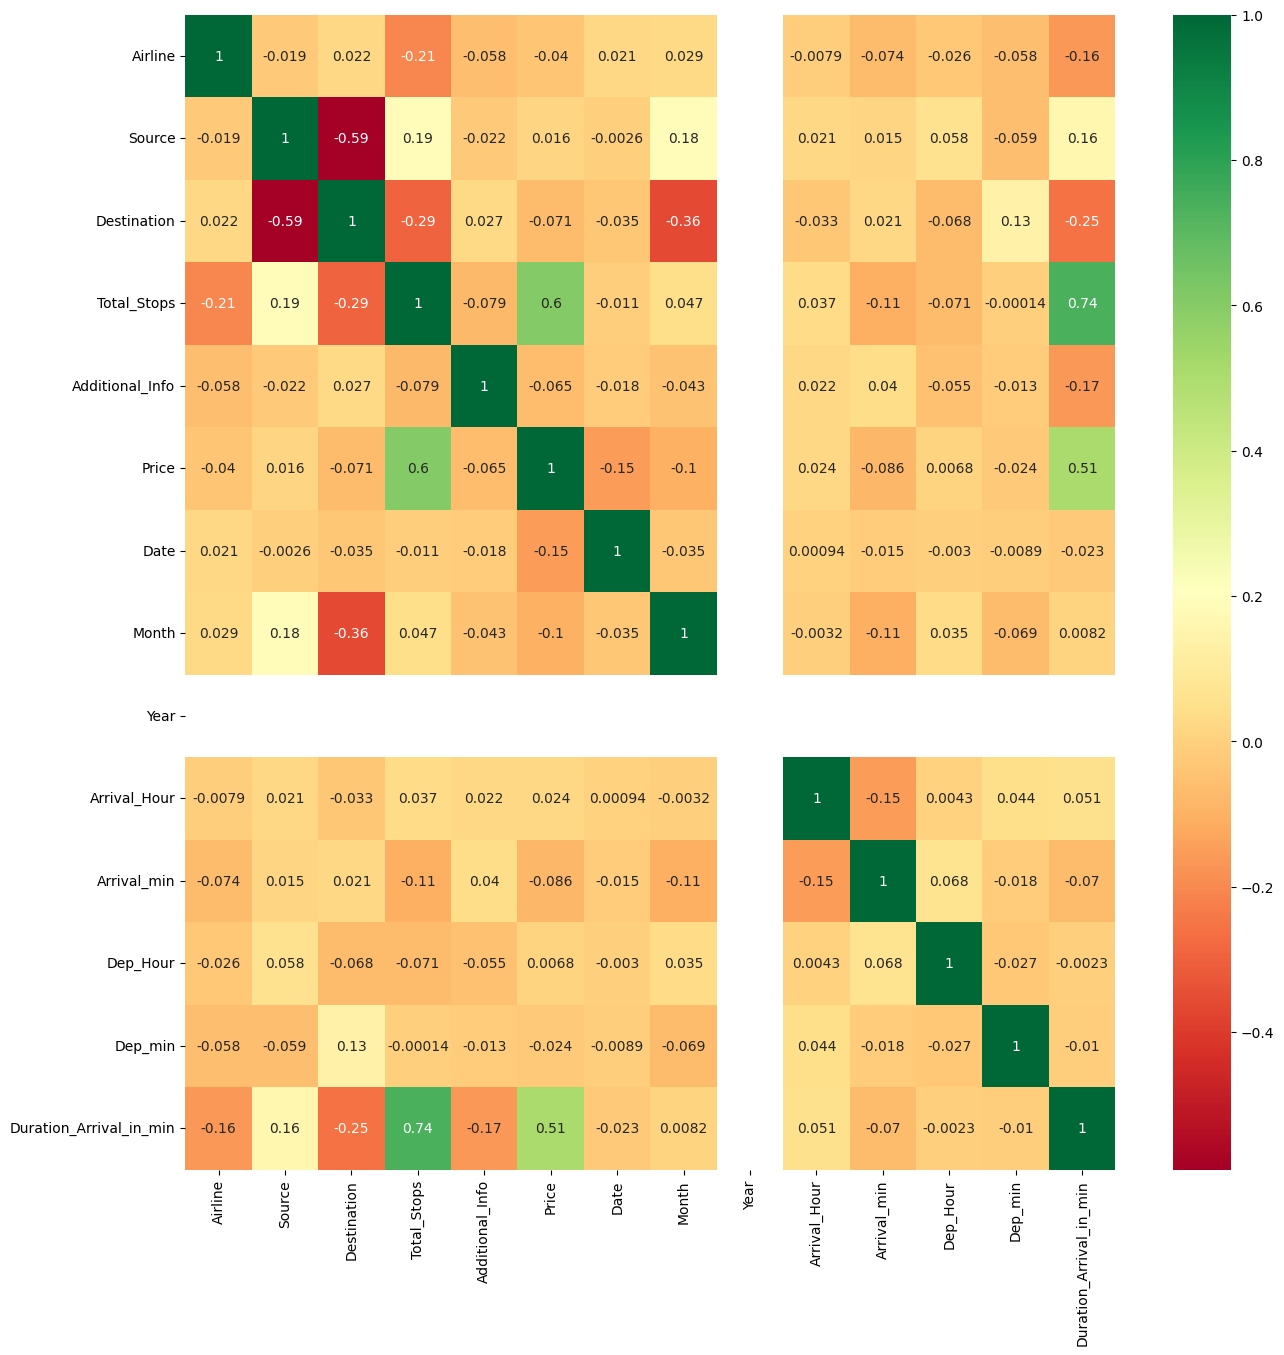

In [68]:
plt.figure(figsize = (15,15))
sns.heatmap(final_df.corr(),annot = True,cmap = "RdYlGn")

# Conclusion : 
we see the corelation between all the features